# Time series analysis and prediction of Rossmannstore sales dataset.

The analysis seeks to analyse the trend of sales in different stores, the factors affecting the sales and predict sales in the different stores.

The Rossmann company has many stores across different cities that use four different models, a,b,c and d.The stores also have three different types of assortments, a,b and c.

The data team identified factors such as promotions, competition, school and state holidays, seasonality, and locality as necessary for predicting the sales across the various stores, machine learning and deep learning algorithms will be used to determine the impact of these factors and train the model for prediction.

In [1]:
import pandas as pd
import numpy as np
import logging
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Specify logging level and parameters

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s:%(name)s:%(message)s')

file_handler = logging.FileHandler('EDA.log')
#file_handler.setLevel(logging.ERROR)
file_handler.setFormatter(formatter)

#stream_handler = logging.StreamHandler()
#stream_handler.setFormatter(formatter)

logger.addHandler(file_handler)
#logger.addHandler(stream_handler)

In [3]:
pd.set_option('max_column', None)
# load the datasets
store_data=pd.read_csv('sales_prediction/data/store.csv')   #describes the characteristics of a store
train_data=pd.read_csv('sales_prediction/data/train.csv')
test_data=pd.read_csv('sales_prediction/data/test.csv')

C:\Users\Stella\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
# create a copy of each dataset
store=store_data.copy()
train=train_data.copy()
test=test_data.copy()

# Univariate EDA
The first part will look at each variable in the train and test set to see the trends that exist.

Begin by looking at what is in the dataset, use correct datatypes for each variable and make the date column the index

In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
#determine shape of each dataset:
def df_shape(df):
    print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

In [9]:
#shape of store dataset
df_shape(store)

 There are 1115 rows and 10 columns


In [10]:
#shape of train dataset
df_shape(train)

 There are 1017209 rows and 9 columns


In [11]:
#shape of test dataset
df_shape(test)

 There are 41088 rows and 8 columns


In [12]:
#store datatypes
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
#train datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
#test datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [15]:
#convert date column to date type and make it an index
def date_type(df):
    df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    return df

Merge store data and train data

In [16]:
full_train=train.merge(store,on=["Store"],how="outer")
full_train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [17]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Merge store data and test data

In [18]:
full_test=test.merge(store,on=["Store"],how="outer")
full_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,1,4.0,2015-09-17,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857.0,1,3.0,2015-09-16,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713.0,1,2.0,2015-09-15,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569.0,1,1.0,2015-09-14,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425.0,1,7.0,2015-09-13,0.0,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [19]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41347 entries, 0 to 41346
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  float64
 1   Store                      41347 non-null  int64  
 2   DayOfWeek                  41088 non-null  float64
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  float64
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  float64
 8   StoreType                  41347 non-null  object 
 9   Assortment                 41347 non-null  object 
 10  CompetitionDistance        41250 non-null  float64
 11  CompetitionOpenSinceMonth  26094 non-null  float64
 12  CompetitionOpenSinceYear   26094 non-null  float64
 13  Promo2                     41347 non-null  int

In [20]:
df_shape(full_train)

 There are 1017209 rows and 18 columns


In [21]:
df_shape(full_test)

 There are 41347 rows and 17 columns


Impute missing values.

The train set has missing values.under CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval. These values will be replaced by 0 and we will assume the variable is not applicable.

The test set has missing values for several values.Values without an Id will be dropped



In [22]:
#values without Id in train data
full_test[full_test['Id'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
41088,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
41089,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
41090,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
41091,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
41092,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,a,a,50.0,12.0,2005.0,1,26.0,2010.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,NaN,1093,NaN,NaN,NaN,NaN,NaN,NaN,c,c,10450.0,6.0,2009.0,0,NaN,NaN,NaN
41343,NaN,1095,NaN,NaN,NaN,NaN,NaN,NaN,a,a,690.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
41344,NaN,1098,NaN,NaN,NaN,NaN,NaN,NaN,a,a,1830.0,11.0,2004.0,0,NaN,NaN,NaN
41345,NaN,1108,NaN,NaN,NaN,NaN,NaN,NaN,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN


In [23]:
#drop values without id
full_test = full_test.dropna(subset=['Id']).reset_index(drop=True)

In [24]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  float64
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  float64
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  float64
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  float64
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

The values remaining with null values are "Open",

The values are missing for one particular store with Id 622 from the period 5th September-17th September 2015. There was no holiday during these days.The values will be imputed with one, where there was a promo going on and the rest will be dropped.

Missing values for CompetitionDistance, CompetitionSinceMonth, CompetitionSinceYear, Promo2SinceWeek, PromoSinceYear and PromoInterval will be imputed with 0

In [25]:
full_test[full_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22992,480.0,622,4.0,2015-09-17,NaN,1.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22993,1336.0,622,3.0,2015-09-16,NaN,1.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22994,2192.0,622,2.0,2015-09-15,NaN,1.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22995,3048.0,622,1.0,2015-09-14,NaN,1.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22997,4760.0,622,6.0,2015-09-12,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22998,5616.0,622,5.0,2015-09-11,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22999,6472.0,622,4.0,2015-09-10,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23000,7328.0,622,3.0,2015-09-09,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23001,8184.0,622,2.0,2015-09-08,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23002,9040.0,622,1.0,2015-09-07,NaN,0.0,0,0.0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [26]:
full_test = full_test.drop(full_test[(full_test['Open'].isnull() == True) & (full_test['Promo'] == 0.0)].index)
full_test['Open'] = full_test['Open'].fillna(1)

In [27]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41081 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41081 non-null  float64
 1   Store                      41081 non-null  int64  
 2   DayOfWeek                  41081 non-null  float64
 3   Date                       41081 non-null  object 
 4   Open                       41081 non-null  float64
 5   Promo                      41081 non-null  float64
 6   StateHoliday               41081 non-null  object 
 7   SchoolHoliday              41081 non-null  float64
 8   StoreType                  41081 non-null  object 
 9   Assortment                 41081 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41081 non-null  int

In [28]:
#replace the rest of the null variables with zero
full_test=full_test.fillna(0)

In [29]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41081 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41081 non-null  float64
 1   Store                      41081 non-null  int64  
 2   DayOfWeek                  41081 non-null  float64
 3   Date                       41081 non-null  object 
 4   Open                       41081 non-null  float64
 5   Promo                      41081 non-null  float64
 6   StateHoliday               41081 non-null  object 
 7   SchoolHoliday              41081 non-null  float64
 8   StoreType                  41081 non-null  object 
 9   Assortment                 41081 non-null  object 
 10  CompetitionDistance        41081 non-null  float64
 11  CompetitionOpenSinceMonth  41081 non-null  float64
 12  CompetitionOpenSinceYear   41081 non-null  float64
 13  Promo2                     41081 non-null  int

In [30]:
#replace missiing values in train with 0
full_train=full_train.fillna(0)

In [31]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [32]:
#define function to clean and impute missing values
#def clean(df):
    

Check the distribution of train and test datasets.

The histograms below show that the train and test set variables have similar distribution therefore the prediction can be done on the test dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA426CB988>,
      dtype=object)

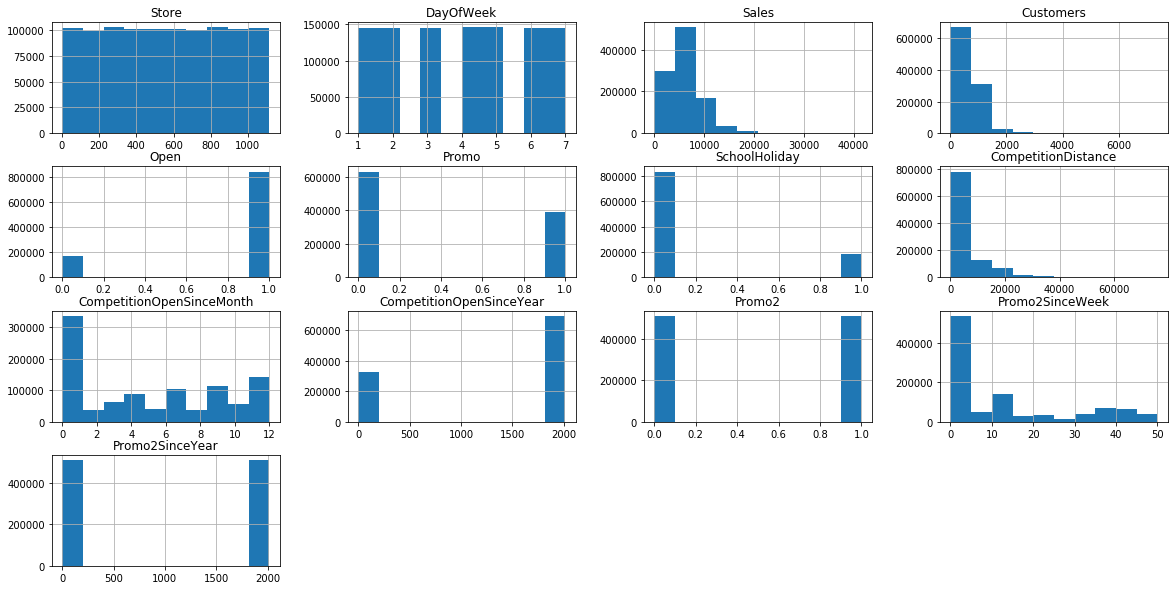

In [33]:
#Distribution of train set
full_train.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA42731688>,
      dtype=object)

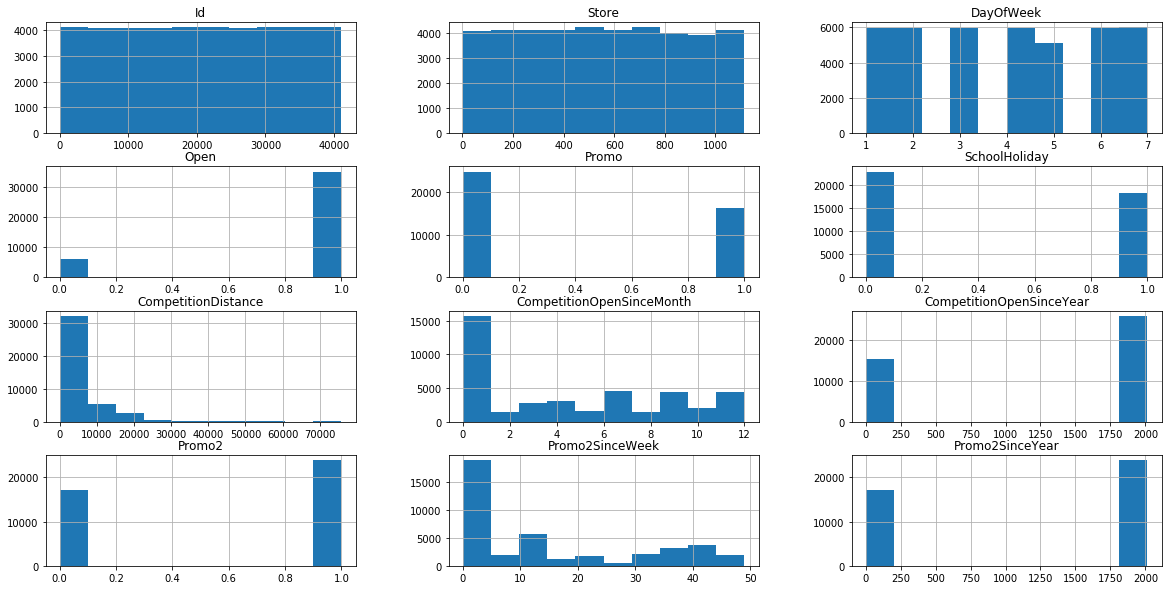

In [34]:
#Distribution of test set
full_test.hist(figsize=(20,10))

Plot of sales v/s state holidays.

In [35]:
full_train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [36]:
full_train.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [37]:
#get average sales per week
average_sales = pd.DataFrame(date_type(full_train).groupby('WeekOfYear')["Sales"].mean()).rename(columns={'Sales':'Average Sales'}).reset_index()
average_sales.head()

,WeekOfYear,Average Sales
0,1,4339.044625
1,2,6354.031219
2,3,5111.601025
3,4,5595.613496
4,5,5463.895836


In [38]:
state_holidays=pd.DataFrame(date_type(full_train).groupby('WeekOfYear')["StateHoliday"].unique()).rename(columns={'StateHoliday':'Holiday'}).reset_index()

In [51]:
def holiday(arr):
    return np.count_nonzero(arr==0)    

In [52]:
state_holidays['Holiday']=state_holidays.Holiday.apply(holiday)
state_holidays.head()

,WeekOfYear,Holiday
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


In [53]:
sales_hol=average_sales.merge(state_holidays,on=["WeekOfYear"],how="outer")
sales_hol.head()

,WeekOfYear,Average Sales,Holiday
0,1,4339.044625,1
1,2,6354.031219,1
2,3,5111.601025,0
3,4,5595.613496,0
4,5,5463.895836,0


Sales increase whenever there is a holiday

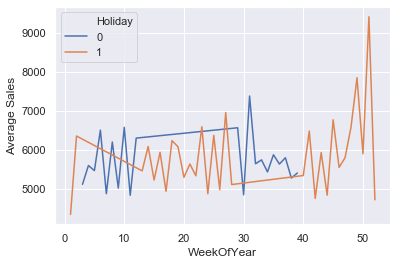

In [54]:
sns.set()
sns.lineplot(x="WeekOfYear", y="Average Sales", hue="Holiday", markers=True, data=sales_hol)

Seasonal (Christmas, Easter etc) purchase behaviours,
Sales increase sharply at the end of the year, around Christmas time

Text(0.5, 0, 'Week Of Year')

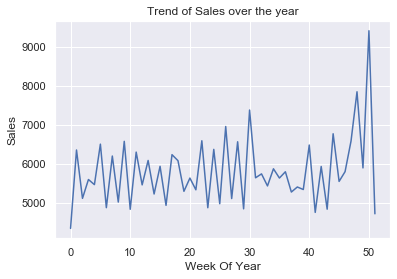

In [55]:
average_sales['Average Sales'].plot.line()

plt.title('Trend of Sales over the year')
plt.ylabel("Sales", size=12)
plt.xlabel('Week Of Year', size=12)

The correlation between sales and number of customers is strongly positive, when the number of customers increase, sales increase.

In [56]:
full_train[['Sales','Customers']].corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


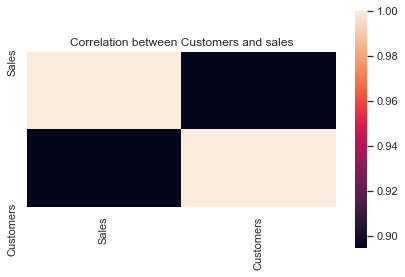

In [57]:
ax = sns.heatmap(full_train[['Sales','Customers']].corr(), square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.title('Correlation between Customers and sales')
plt.tight_layout()
plt.show()

Analysis of the sales during promotions shows that sales increase when the stores have promos.

The number of customers also increases during promos, that measn the stores attract new customers when they run promotions. 

The sales increase by a greater margin compared to the number of customers, that means existing customers spend more during promotions than they would on average.


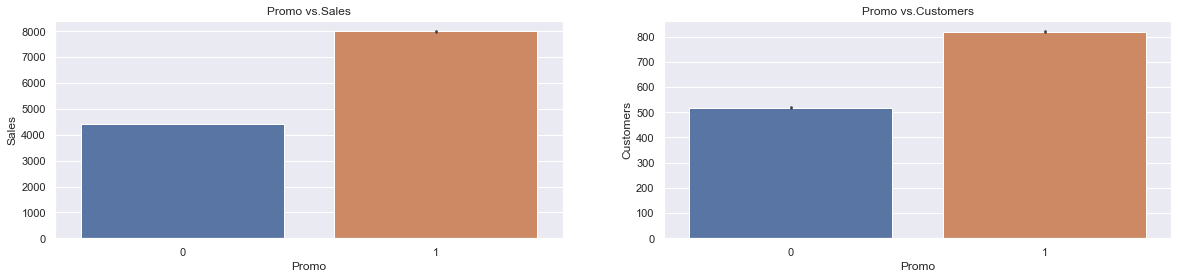

In [58]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=full_train, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=full_train, ax=axis2)

Store type b has more sales and more customers.

All the stores experience more sales and more customers but stores of type a,d and c experience a higher margin for both variables during promos compared to stores of type b. Promos should be deployed more in stores a, d and c.

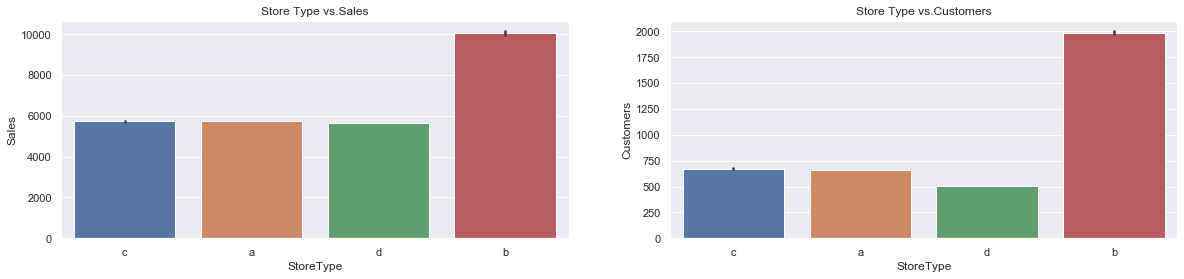

In [59]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Store Type vs.Sales')
axis2.title.set_text('Store Type vs.Customers')
sns.barplot(x='StoreType', y='Sales', data=full_train, ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=full_train, ax=axis2)

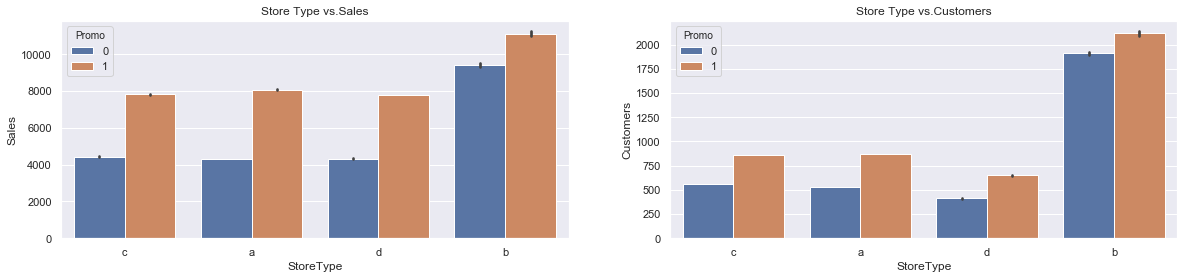

In [60]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Store Type vs.Sales')
axis2.title.set_text('Store Type vs.Customers')
sns.barplot(x='StoreType', y='Sales', data=full_train,hue='Promo', ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=full_train,hue='Promo', ax=axis2)

Trends of customer behavior during store open and closing times

All the four types of stores are open on Weekdays and only stores of type b are open on Sunday. Store b makes most of its sales on Sunday and Monday and its least sales on Saturday. The sales for store a reduce on the weekend and are highest on Monday. 

All the stores experience more sales on Monday than other days of the week. This means the stores make more sales on the day they open after being closed.



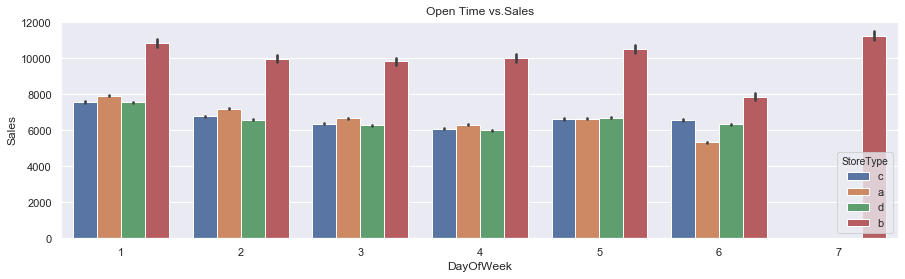

In [61]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
axis1.title.set_text('Open Time vs.Sales')
sns.barplot(x='DayOfWeek', y='Sales',hue='StoreType', data=full_train, ax=axis1)

Stores that have an assortment type of b(extra assortment) record higher sales.

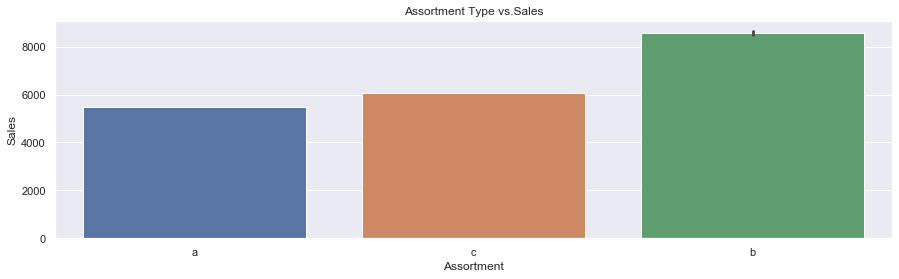

In [62]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
axis1.title.set_text('Assortment Type vs.Sales')
sns.barplot(x='Assortment', y='Sales', data=full_train, ax=axis1)

The shorter the distance from the competitor the higher the sales.

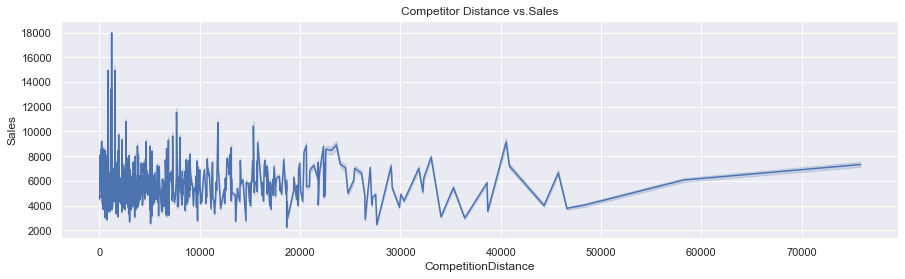

In [93]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
axis1.title.set_text('Competitor Distance vs.Sales')
sns.lineplot(x='CompetitionDistance', y='Sales', data=full_train, ax=axis1)

Most competitors joined the market in the 2000s, the sales have constantly reduced through this time. At the time when the competition was highest, the total sales also dropped significantly

In [90]:
average_sales_per_year = pd.DataFrame(date_type(full_train).groupby('Year')["Sales"].sum()).rename(columns={'Sales':'Total Sales'}).reset_index()
average_sales_per_year.head()

,Year,Total Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


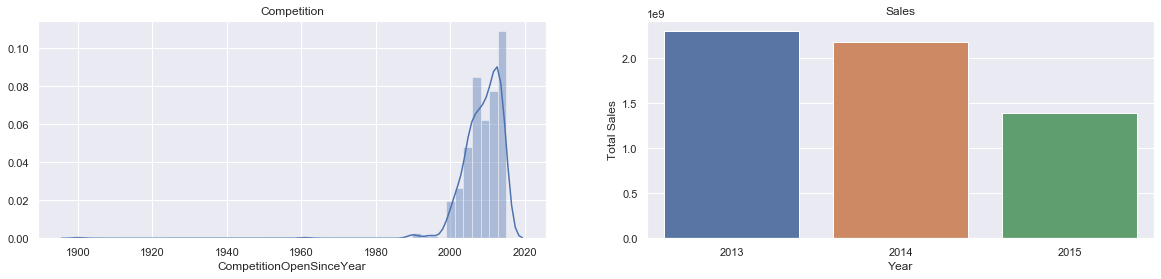

In [92]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Competition')
axis2.title.set_text('Sales')
sns.distplot(store['CompetitionOpenSinceYear'][~np.isnan(store['CompetitionOpenSinceYear'])], ax=axis1)
sns.barplot(x='Year', y='Total Sales', data=average_sales_per_year, ax=axis2)